In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

In [6]:
from sklearn.datasets import load_digits

In [7]:
data=load_digits()

In [9]:
x = data.data

In [10]:
y = data.target

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
#Trine Test Split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [14]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Trine set:',x_trine.shape,y_trine.shape)
print('Test set:',x_test.shape,y_test.shape)

Trine set: (1437, 64) (1437,)
Test set: (360, 64) (360,)


In [15]:
#Classification KNN
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Trining
k=4
#trine model and predict
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_trine,y_trine)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [17]:
neigh.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
trine_score=neigh.score(x_trine,y_trine)
trine_score

0.9895615866388309

In [19]:
test_score=neigh.score(x_test,y_test)
test_score

0.9805555555555555

In [20]:
neigh.weights

'uniform'

In [21]:
yhat=neigh.predict(x_test)
yhat[0:4]

array([8, 7, 0, 5])

In [22]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
0,6,8
1,7,7
2,0,0
3,5,5
4,3,3
...,...,...
355,8,8
356,5,5
357,4,4
358,3,3


In [23]:
#Accuracy Evaluation
from sklearn import metrics
print("Trine Set Accuracy:",metrics.accuracy_score(y_trine,neigh.predict(x_trine)))
print("Test Set Accuracy:",metrics.accuracy_score(y_test,yhat))

Trine Set Accuracy: 0.9895615866388309
Test Set Accuracy: 0.9805555555555555


In [24]:
# changing the k values
# what about other k
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfustionMx=[];
for n in range(1,ks):
    # trine model and predict
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_trine,y_trine)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.98888889, 0.98888889, 0.98888889, 0.98055556, 0.98611111,
       0.98055556, 0.98333333, 0.98055556, 0.98333333, 0.98055556,
       0.97777778, 0.97777778, 0.97777778, 0.98055556, 0.97777778,
       0.98055556, 0.98055556, 0.98055556, 0.98055556])

In [25]:
std_acc

array([0.00552461, 0.00552461, 0.00552461, 0.00727751, 0.00616802,
       0.00727751, 0.0067472 , 0.00727751, 0.0067472 , 0.00727751,
       0.00776895, 0.00776895, 0.00776895, 0.00727751, 0.00776895,
       0.00727751, 0.00727751, 0.00727751, 0.00727751])

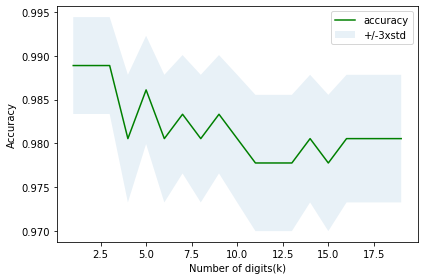

In [27]:
#plot model accuracy for different number of neighbors
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of digits(k)')
plt.tight_layout()
plt.show()